
Test Accuracy (Gradient Boosting Machine): 61.17%
Classification Report (Gradient Boosting Machine):
                 precision    recall  f1-score   support

      Positive       0.65      0.56      0.60      1262
      Negative       0.62      0.51      0.56      1257
  Not_relevant       0.59      0.51      0.55      1238
Mixed Feelings       0.66      0.75      0.70      1218
       Neutral       0.56      0.73      0.63      1312

      accuracy                           0.61      6287
     macro avg       0.62      0.61      0.61      6287
  weighted avg       0.61      0.61      0.61      6287



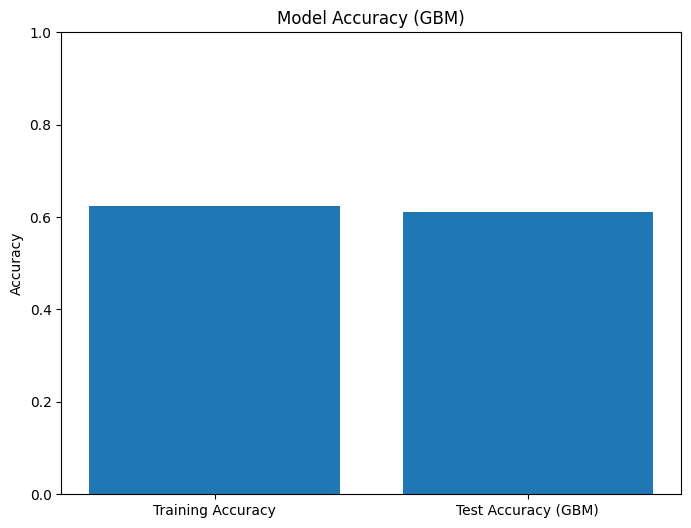

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load data from CSV
file_path = 'final_manglish.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Ensure 'commentText' column contains strings
data['commentText'] = data['commentText'].astype(str)

# Function to convert sentiment labels to numerical values
sentiment_dict = {
    'Positive': 0,
    'Negative': 1,
    'Not_relevant': 2,
    'Mixed Feelings': 3,
    'Neutral': 4
}

data['Sentiment_Class'] = data['Sentiment_Class'].map(sentiment_dict)

# Tokenization and sequence padding
max_words = 1000
max_seq_length = 100
vectorizer = CountVectorizer(max_features=max_words)
X = vectorizer.fit_transform(data['commentText'])
y = data['Sentiment_Class']

# Upsample minority classes to match the size of the majority class
data_upsampled = pd.concat([
    resample(data[data['Sentiment_Class'] == sentiment_dict['Positive']], replace=True, n_samples=len(data[data['Sentiment_Class'] == sentiment_dict['Not_relevant']])),
    resample(data[data['Sentiment_Class'] == sentiment_dict['Negative']], replace=True, n_samples=len(data[data['Sentiment_Class'] == sentiment_dict['Not_relevant']])),
    resample(data[data['Sentiment_Class'] == sentiment_dict['Not_relevant']], replace=True, n_samples=len(data[data['Sentiment_Class'] == sentiment_dict['Not_relevant']])),
    resample(data[data['Sentiment_Class'] == sentiment_dict['Mixed Feelings']], replace=True, n_samples=len(data[data['Sentiment_Class'] == sentiment_dict['Not_relevant']])),
    resample(data[data['Sentiment_Class'] == sentiment_dict['Neutral']], replace=True, n_samples=len(data[data['Sentiment_Class'] == sentiment_dict['Not_relevant']]))
])

# Tokenization and sequence padding for balanced data
X_upsampled = vectorizer.fit_transform(data_upsampled['commentText'])
y_upsampled = data_upsampled['Sentiment_Class']

# Split the upsampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled, test_size=0.2, random_state=10)

# Build and train Gradient Boosting Machine model
gbm_model = GradientBoostingClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed
gbm_model.fit(X_train, y_train)

# Evaluate the Gradient Boosting Machine model on test data
y_pred_gbm = gbm_model.predict(X_test)
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print(f"\nTest Accuracy (Gradient Boosting Machine): {accuracy_gbm * 100:.2f}%")

# Generate predictions for Gradient Boosting Machine
reverse_sentiment_dict = {v: k for k, v in sentiment_dict.items()}
y_pred_labels_gbm = [reverse_sentiment_dict[label] for label in y_pred_gbm]

# Print complete classification report for Gradient Boosting Machine
print("Classification Report (Gradient Boosting Machine):\n", classification_report(y_test, y_pred_gbm, target_names=sentiment_dict.keys()))

# Plotting the accuracy
plt.figure(figsize=(8, 6))
plt.bar(['Training Accuracy', 'Test Accuracy (GBM)'], [accuracy_score(y_train, gbm_model.predict(X_train)), accuracy_gbm])
plt.ylabel('Accuracy')
plt.title('Model Accuracy (GBM)')
plt.ylim(0, 1)
plt.show()


Test Accuracy (XGBoost): 76.97%
Classification Report (XGBoost):
                 precision    recall  f1-score   support

      Positive       0.88      0.94      0.91       295
      Negative       0.81      0.77      0.79       318
  Not_relevant       0.69      0.77      0.73       330
Mixed Feelings       0.66      0.65      0.66       305
       Neutral       0.81      0.73      0.77       324

      accuracy                           0.77      1572
     macro avg       0.77      0.77      0.77      1572
  weighted avg       0.77      0.77      0.77      1572



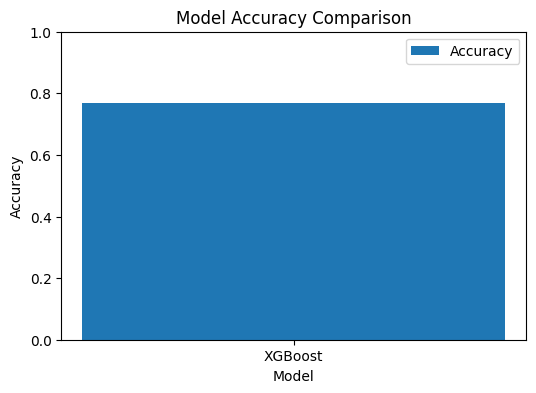

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load data from CSV
file_path = 'final_manglish.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Ensure 'commentText' column contains strings
data['commentText'] = data['commentText'].astype(str)

# Function to convert sentiment labels to numerical values
sentiment_dict = {
    'Positive': 0,
    'Negative': 1,
    'Not_relevant': 2,
    'Mixed Feelings': 3,
    'Neutral': 4
}

data['Sentiment_Class'] = data['Sentiment_Class'].map(sentiment_dict)

# Tokenization and sequence padding
max_words = 1000
max_seq_length = 100
vectorizer = CountVectorizer(max_features=max_words)
X = vectorizer.fit_transform(data['commentText'])
y = data['Sentiment_Class']

# Upsample minority classes to match the size of the majority class
data_upsampled = pd.concat([
    resample(data[data['Sentiment_Class'] == sentiment_dict['Positive']], replace=True, n_samples=len(data[data['Sentiment_Class'] == sentiment_dict['Not_relevant']])),
    resample(data[data['Sentiment_Class'] == sentiment_dict['Negative']], replace=True, n_samples=len(data[data['Sentiment_Class'] == sentiment_dict['Not_relevant']])),
    resample(data[data['Sentiment_Class'] == sentiment_dict['Not_relevant']], replace=True, n_samples=len(data[data['Sentiment_Class'] == sentiment_dict['Not_relevant']])),
    resample(data[data['Sentiment_Class'] == sentiment_dict['Mixed Feelings']], replace=True, n_samples=len(data[data['Sentiment_Class'] == sentiment_dict['Not_relevant']])),
    resample(data[data['Sentiment_Class'] == sentiment_dict['Neutral']], replace=True, n_samples=len(data[data['Sentiment_Class'] == sentiment_dict['Not_relevant']]))
])

# Tokenization and sequence padding for balanced data
X_upsampled = vectorizer.fit_transform(data_upsampled['commentText'])
y_upsampled = data_upsampled['Sentiment_Class']

# Split the upsampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled, test_size=0.05, random_state=10)

# Build and train XGBoost model
xgb_model = XGBClassifier(random_state=42)  # You can adjust hyperparameters as needed
xgb_model.fit(X_train, y_train)

# Evaluate the XGBoost model on test data
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Test Accuracy (XGBoost): {accuracy_xgb * 100:.2f}%")

# Generate predictions for XGBoost
reverse_sentiment_dict = {v: k for k, v in sentiment_dict.items()}
y_test_labels = [reverse_sentiment_dict[label] for label in y_test]
y_pred_labels_xgb = [reverse_sentiment_dict[label] for label in y_pred_xgb]

# Print complete classification report for XGBoost
print("Classification Report (XGBoost):\n", classification_report(y_test_labels, y_pred_labels_xgb, target_names=sentiment_dict.keys()))

# Plotting the accuracy comparison (XGBoost only)
plt.figure(figsize=(6, 4))
plt.bar(['XGBoost'], [accuracy_xgb], width=0.4, label='Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.legend()
plt.show()


Test Accuracy (XGBoost): 77.62%
Classification Report (XGBoost):
                 precision    recall  f1-score   support

      Positive       0.89      0.97      0.93      1218
      Negative       0.80      0.74      0.77      1257
  Not_relevant       0.74      0.73      0.73      1312
Mixed Feelings       0.68      0.70      0.69      1238
       Neutral       0.78      0.75      0.76      1262

      accuracy                           0.78      6287
     macro avg       0.78      0.78      0.78      6287
  weighted avg       0.78      0.78      0.77      6287



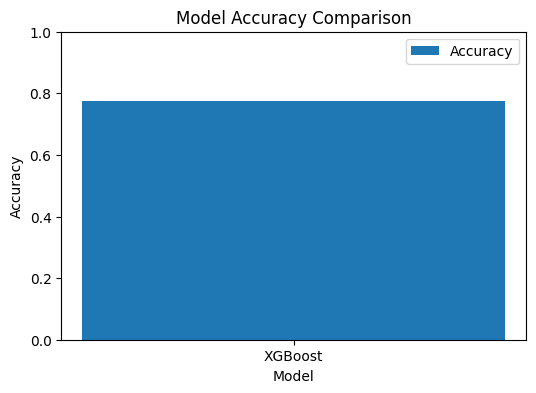

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Load data from CSV
file_path = 'final_manglish.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Ensure 'commentText' column contains strings
data['commentText'] = data['commentText'].astype(str)

# Function to convert sentiment labels to numerical values
sentiment_dict = {
    'Positive': 0,
    'Negative': 1,
    'Not_relevant': 2,
    'Mixed Feelings': 3,
    'Neutral': 4
}

data['Sentiment_Class'] = data['Sentiment_Class'].map(sentiment_dict)

# Tokenization and TF-IDF vectorization
max_words = 1000
tfidf_vectorizer = TfidfVectorizer(max_features=max_words)
X_tfidf = tfidf_vectorizer.fit_transform(data['commentText'])
y = data['Sentiment_Class']

# Upsample minority classes to match the size of the majority class
data_upsampled = pd.concat([
    resample(data[data['Sentiment_Class'] == sentiment_dict['Positive']], replace=True, n_samples=len(data[data['Sentiment_Class'] == sentiment_dict['Not_relevant']])),
    resample(data[data['Sentiment_Class'] == sentiment_dict['Negative']], replace=True, n_samples=len(data[data['Sentiment_Class'] == sentiment_dict['Not_relevant']])),
    resample(data[data['Sentiment_Class'] == sentiment_dict['Not_relevant']], replace=True, n_samples=len(data[data['Sentiment_Class'] == sentiment_dict['Not_relevant']])),
    resample(data[data['Sentiment_Class'] == sentiment_dict['Mixed Feelings']], replace=True, n_samples=len(data[data['Sentiment_Class'] == sentiment_dict['Not_relevant']])),
    resample(data[data['Sentiment_Class'] == sentiment_dict['Neutral']], replace=True, n_samples=len(data[data['Sentiment_Class'] == sentiment_dict['Not_relevant']]))
])

# Tokenization and TF-IDF vectorization for balanced data
X_upsampled_tfidf = tfidf_vectorizer.fit_transform(data_upsampled['commentText'])
y_upsampled = data_upsampled['Sentiment_Class']

# Split the upsampled data into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_upsampled_tfidf, y_upsampled, test_size=0.2, random_state=10)

# Build and train XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_tfidf, y_train)

# Evaluate the XGBoost model on test data
y_pred_xgb = xgb_model.predict(X_test_tfidf)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Test Accuracy (XGBoost): {accuracy_xgb * 100:.2f}%")

# Generate predictions for XGBoost
reverse_sentiment_dict = {v: k for k, v in sentiment_dict.items()}
y_test_labels = [reverse_sentiment_dict[label] for label in y_test]
y_pred_labels_xgb = [reverse_sentiment_dict[label] for label in y_pred_xgb]

# Print complete classification report for XGBoost
print("Classification Report (XGBoost):\n", classification_report(y_test_labels, y_pred_labels_xgb, target_names=sentiment_dict.keys()))

# Plotting the accuracy comparison (XGBoost only)
plt.figure(figsize=(6, 4))
plt.bar(['XGBoost'], [accuracy_xgb], width=0.4, label='Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.legend()
plt.show()
